In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


iris_data = pd.read_csv('iris.csv')  
print(iris_data.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# label encoding

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = iris_data.iloc[:,-1].values
y = le.fit_transform(y)
print(y)

iris_data['Species'] = y

print(iris_data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148  

## Calculate the correlation coefficient between each pair of attributes in the Iris dataset.


In [3]:
correlation_matrix = iris_data.corr()
print(correlation_matrix)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm   
Id             1.000000       0.716676     -0.397729       0.882747  \
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   
Species        0.942830       0.782561     -0.419446       0.949043   

               PetalWidthCm   Species  
Id                 0.899759  0.942830  
SepalLengthCm      0.817954  0.782561  
SepalWidthCm      -0.356544 -0.419446  
PetalLengthCm      0.962757  0.949043  
PetalWidthCm       1.000000  0.956464  
Species            0.956464  1.000000  


## Step 3: Visualize the correlation matrix using a heatmap


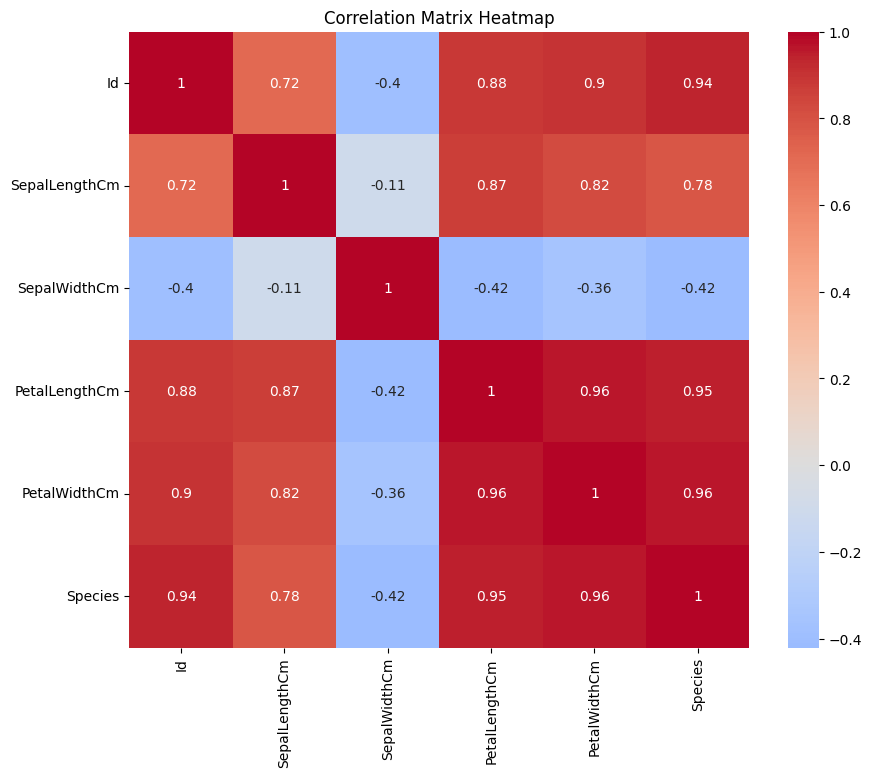

In [4]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()



# Step 4: Identify highly correlated attributes

In [5]:

for x in correlation_matrix:
    for y in correlation_matrix:
        if(correlation_matrix[x][y]>0.7 and x!=y and x>y and x!='Id' and y!='Id'):
            print("These pairs are highly corelated",(x,y))

print("\n\n\n")

for x in correlation_matrix:
    for y in correlation_matrix:
        if(correlation_matrix[x][y]>0 and x!=y and x>y and x!='Id' and y!='Id'):
            print("These pairs are positively corelated",(x,y))
        elif(correlation_matrix[x][y]<0 and x!=y and x>y and x!='Id' and y!='Id'):
            print("These pairs are negatively corelated",(x,y))
        elif(correlation_matrix[x][y]==0 and x!=y and x>y and x!='Id' and y!='Id'):
            print(" not corelated pair",(x,y))



These pairs are highly corelated ('SepalLengthCm', 'PetalLengthCm')
These pairs are highly corelated ('SepalLengthCm', 'PetalWidthCm')
These pairs are highly corelated ('PetalWidthCm', 'PetalLengthCm')
These pairs are highly corelated ('Species', 'SepalLengthCm')
These pairs are highly corelated ('Species', 'PetalLengthCm')
These pairs are highly corelated ('Species', 'PetalWidthCm')




These pairs are positively corelated ('SepalLengthCm', 'PetalLengthCm')
These pairs are positively corelated ('SepalLengthCm', 'PetalWidthCm')
These pairs are negatively corelated ('SepalWidthCm', 'SepalLengthCm')
These pairs are negatively corelated ('SepalWidthCm', 'PetalLengthCm')
These pairs are negatively corelated ('SepalWidthCm', 'PetalWidthCm')
These pairs are positively corelated ('PetalWidthCm', 'PetalLengthCm')
These pairs are positively corelated ('Species', 'SepalLengthCm')
These pairs are negatively corelated ('Species', 'SepalWidthCm')
These pairs are positively corelated ('Species', 'Pe

# attributes might have a strong influence on the characteristics of iris flowers

In [9]:

print("These attributes have a strong influence on the characteristics of iris flowers : ")
for x in correlation_matrix:
    for y in correlation_matrix:
        if(correlation_matrix[x][y]>0.7 and x!=y and x>y and x=='Species' and x !='Id' and y!='Id'):
            print(y)



These attributes have a strong influence on the characteristics of iris flowers : 
SepalLengthCm
PetalLengthCm
PetalWidthCm
